#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Function for extracting data from the Flight Aware webpage

In [2]:
def extract_data(flight_type):
    offset = [0, 20]
    data = []
    aircraft = []
    for i in offset:
        page = "https://flightaware.com/live/aircrafttype/"+str(flight_type)+"?;offset="+str(i)+";order=actualdeparturetime;sort=DESC"
        data = pd.read_html(page, attrs={"class":"prettyTable fullWidth"})
        if aircraft is None:
            aircraft = pd.DataFrame(data[0])
        else:
            df = pd.DataFrame(data[0])
            aircraft.append(df)
    return aircraft

In [3]:
flight_type = ["C208", "PC12", "C182"]
for i in flight_type:
    aircraft = extract_data(i)
    aircraft_table = aircraft[0].append(aircraft[1]).copy()
    aircraft_table.to_excel("Aircraft type "+i+".xlsx", sheet_name = i)

#### ANALYSIS FOR AIRCRAFT TYPE C208

#### Reading the data for Aircraft Type C208 in the Jupyter Notebook

In [4]:
c208 = pd.read_excel("/Users/apurvasalvi/Desktop/magniX/Aircraft type C208.xlsx")
c208

,Ident,Type,Origin,Destination,Departure,EstimatedArrival Time,EstimatedTimeEnroute,EstimatedTimeEnroute (Min)
0,MTN7303,C208,Baltimore/Washington Intl (KBWI),Newark Liberty Intl (KEWR),Thu 11:06PM EDT,Fri 12:17AM EDT,01:10,70.0
1,SDA261,C208,Wellington Int'l (WLG / NZWN),Woodbourne (BHE / NZWB),Fri 03:06PM NZST,Fri 03:36PM NZST,00:30,30.0
2,N414CY,C208,Mobile Downtown (KBFM),Montgomery Rgnl (KMGM),Thu 10:05PM CDT,Thu 11:02PM CDT,00:56,56.0
3,MTN7305,C208,Baltimore/Washington Intl (KBWI),Newark Liberty Intl (KEWR),Thu 11:02PM EDT,Fri 12:12AM EDT,01:10,70.0
4,IRO7339,C208,South Bend Intl (KSBN),Indianapolis Intl (KIND),Thu 10:59PM EDT,Thu 11:46PM EDT,00:45,45.0
5,FDY956,C208,Daniel K Inouye Intl (PHNL),Molokai (MKK / PHMK),Thu 04:59PM HST,Thu 05:20PM HST,00:24,24.0
6,VH-BAM,C208,Darnley Island (NLF / YDNI),Yorke Island (OKR / YYKI),Fri 12:58PM AEST,Fri 01:19PM AEST,00:21,21.0
7,BVN7369,C208,Dothan Rgnl (KDHN),Memphis Intl (KMEM),Thu 09:57PM CDT,Fri 12:02AM CDT,02:05,125.0
8,N862FE,C208,Baltimore/Washington Intl (KBWI),NaN,Thu 10:54PM EDT,NaN,NaN,NaN
9,MTN7304,C208,Baltimore/Washington Intl (KBWI),Newark Liberty Intl (KEWR),Thu 10:54PM EDT,Fri 12:04AM EDT,01:10,70.0


#### Checking for NaN in the data

In [5]:
c208.isnull().sum()

Ident                          0
Type                           0
Origin                         0
Destination                   10
Departure                      0
EstimatedArrival Time         11
EstimatedTimeEnroute          11
EstimatedTimeEnroute (Min)    11
dtype: int64

After observing the above data, we can see that the Destination, EstimatedArrival Time, EstimatedTimeEnroute and EstimatedTimeEnroute (Min) columns have NaN values. It is safe to assume that the columns with Departure values missing could be the cancelled flights which did not depart from the location. 

Tracking the cancelled flight in a different Dataframe called c208_cancelled.

In [6]:
c208_cancelled = c208[c208['Destination'].isnull()]
c208_cancelled.Destination = c208_cancelled.Destination.fillna('Cancelled Flight')
c208_cancelled.drop(['EstimatedArrival Time', 'EstimatedTimeEnroute', 'EstimatedTimeEnroute (Min)'], axis=1)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Ident,Type,Origin,Destination,Departure
8,N862FE,C208,Baltimore/Washington Intl (KBWI),Cancelled Flight,Thu 10:54PM EDT
10,KMK8,C208,Molokai (MKK / PHMK),Cancelled Flight,Thu 04:54PM HST
12,N208GE,C208,"Near Kodiak, AK",Cancelled Flight,Thu 06:50PM AKDT
16,FDY957,C208,Ellison Onizuka Kona Intl At Keahole (KOA / PHKO),Cancelled Flight,Thu 04:42PM HST
18,N25JA,C208,Lake Hood (LHD / PALH),Cancelled Flight,Thu 06:37PM AKDT
19,N707RA,C208,"Near Kongiganak, AK",Cancelled Flight,Thu 06:37PM AKDT
29,N9655B,C208,Jim & Julie's (96WA),Cancelled Flight,Thu 07:14PM PDT
32,N786WW,C208,"Near Page, AZ",Cancelled Flight,Thu 06:59PM MST
35,N707RA,C208,Bethel (BET / PABE),Cancelled Flight,Thu 05:50PM AKDT
39,N1029Y,C208,Bethel (BET / PABE),Cancelled Flight,Thu 05:35PM AKDT


In [7]:
c208_cancelled.Destination = c208_cancelled.Destination.fillna('Cancelled Flight')
c208_cancelled

,Ident,Type,Origin,Destination,Departure,EstimatedArrival Time,EstimatedTimeEnroute,EstimatedTimeEnroute (Min)
8,N862FE,C208,Baltimore/Washington Intl (KBWI),Cancelled Flight,Thu 10:54PM EDT,NaN,NaN,NaN
10,KMK8,C208,Molokai (MKK / PHMK),Cancelled Flight,Thu 04:54PM HST,NaN,NaN,NaN
12,N208GE,C208,"Near Kodiak, AK",Cancelled Flight,Thu 06:50PM AKDT,NaN,NaN,NaN
16,FDY957,C208,Ellison Onizuka Kona Intl At Keahole (KOA / PHKO),Cancelled Flight,Thu 04:42PM HST,NaN,NaN,NaN
18,N25JA,C208,Lake Hood (LHD / PALH),Cancelled Flight,Thu 06:37PM AKDT,NaN,NaN,NaN
19,N707RA,C208,"Near Kongiganak, AK",Cancelled Flight,Thu 06:37PM AKDT,NaN,NaN,NaN
29,N9655B,C208,Jim & Julie's (96WA),Cancelled Flight,Thu 07:14PM PDT,NaN,NaN,NaN
32,N786WW,C208,"Near Page, AZ",Cancelled Flight,Thu 06:59PM MST,NaN,NaN,NaN
35,N707RA,C208,Bethel (BET / PABE),Cancelled Flight,Thu 05:50PM AKDT,NaN,NaN,NaN
39,N1029Y,C208,Bethel (BET / PABE),Cancelled Flight,Thu 05:35PM AKDT,NaN,NaN,NaN


#### Visualizing the total number of flights which got cancelled from each of these airports

Text(0.5, 0, 'Name of the airport')

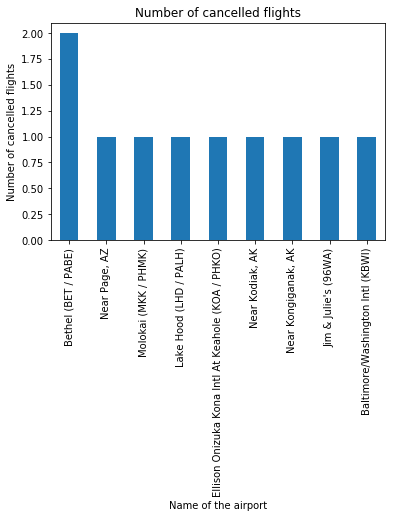

In [8]:
c208_cancelled['Origin'].value_counts().plot(kind='bar')
plt.title("Number of cancelled flights")
plt.ylabel("Number of cancelled flights")
plt.xlabel("Name of the airport")

The airport at Bethel has the most number of cancelled flights today

#### Dropping the Cancelled Flights from the original Dataframe

In [9]:
c208.dropna(axis=0, subset=["Destination"], inplace=True)

In [10]:
c208

,Ident,Type,Origin,Destination,Departure,EstimatedArrival Time,EstimatedTimeEnroute,EstimatedTimeEnroute (Min)
0,MTN7303,C208,Baltimore/Washington Intl (KBWI),Newark Liberty Intl (KEWR),Thu 11:06PM EDT,Fri 12:17AM EDT,01:10,70.0
1,SDA261,C208,Wellington Int'l (WLG / NZWN),Woodbourne (BHE / NZWB),Fri 03:06PM NZST,Fri 03:36PM NZST,00:30,30.0
2,N414CY,C208,Mobile Downtown (KBFM),Montgomery Rgnl (KMGM),Thu 10:05PM CDT,Thu 11:02PM CDT,00:56,56.0
3,MTN7305,C208,Baltimore/Washington Intl (KBWI),Newark Liberty Intl (KEWR),Thu 11:02PM EDT,Fri 12:12AM EDT,01:10,70.0
4,IRO7339,C208,South Bend Intl (KSBN),Indianapolis Intl (KIND),Thu 10:59PM EDT,Thu 11:46PM EDT,00:45,45.0
5,FDY956,C208,Daniel K Inouye Intl (PHNL),Molokai (MKK / PHMK),Thu 04:59PM HST,Thu 05:20PM HST,00:24,24.0
6,VH-BAM,C208,Darnley Island (NLF / YDNI),Yorke Island (OKR / YYKI),Fri 12:58PM AEST,Fri 01:19PM AEST,00:21,21.0
7,BVN7369,C208,Dothan Rgnl (KDHN),Memphis Intl (KMEM),Thu 09:57PM CDT,Fri 12:02AM CDT,02:05,125.0
9,MTN7304,C208,Baltimore/Washington Intl (KBWI),Newark Liberty Intl (KEWR),Thu 10:54PM EDT,Fri 12:04AM EDT,01:10,70.0
11,MTN7307,C208,Harrisburg Intl (KMDT),Newark Liberty Intl (KEWR),Thu 10:51PM EDT,Thu 11:41PM EDT,00:50,50.0


There is still 1 flight which took off from Saipan Intl(PGSN) and landed in Guam Intl(PGUM) which did not record it's Departure and Estimated Arrival Time. 

Text(0.5, 0, 'Name of the airport')

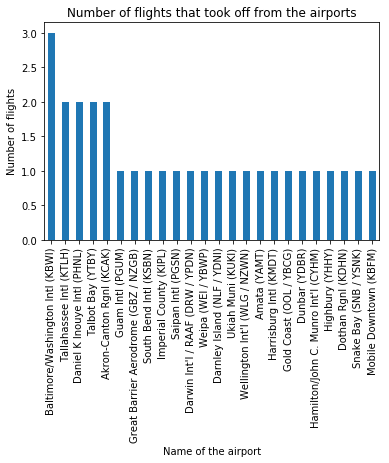

In [11]:
c208['Origin'].value_counts().plot(kind='bar')
plt.title("Number of flights that took off from the airports")
plt.ylabel("Number of flights")
plt.xlabel("Name of the airport")

Thus, for C208 we can conclude that maximum number of flight took off from the Baltimore/Washington Intl(KBWI) and the Airport at Bethel had the most number of cancelled flights.

### ANALYSIS FOR AIRCRAFT TYPE C182

#### Reading the data for Aircraft Type C182 in Jupyter Notebook

In [12]:
c182 = pd.read_excel("/Users/apurvasalvi/Desktop/magniX/Aircraft type C182.xlsx")
c182

,Ident,Type,Origin,Destination,Departure,EstimatedArrival Time,EstimatedTimeEnroute,EstimatedTimeEnroute (Min)
0,N94643,C182,Zamperini Field (KTOA),NaN,Fri 02:08PM PDT,NaN,NaN,NaN
1,N71675,C182,"Near Fort Huachuca Sierra Vista, AZ",NaN,Fri 02:08PM MST,NaN,NaN,NaN
2,N468H,C182,Pointe (PTP / TFFR),NaN,Fri 05:07PM AST,NaN,NaN,NaN
3,N922D,C182,Dumplin Field (86TN),NaN,Fri 05:07PM EDT,NaN,NaN,NaN
4,CAP4390,C182,"Near Evanston, WY",NaN,Fri 03:07PM MDT,NaN,NaN,NaN
5,N92428,C182,Prescott Rgnl - Ernest a Love Fld (KPRC),NaN,Fri 02:06PM MST,NaN,NaN,NaN
6,N7354H,C182,Auburn-Opelika (KAUO),Huntsville Executive (KMDQ),Fri 04:06PM CDT,Fri 05:20PM CDT,01:08,68.0
7,N11JE,C182,Dekalb-Peachtree (KPDK),NaN,Fri 05:05PM EDT,NaN,NaN,NaN
8,N9312X,C182,"Near Chicago/Romeoville, IL",NaN,Fri 04:04PM CDT,NaN,NaN,NaN
9,N5824B,C182,Gooding Muni (KGNG),NaN,Fri 03:04PM MDT,NaN,NaN,NaN


#### Checking for NaN

In [13]:
c182.isnull().sum()

Ident                          0
Type                           0
Origin                         0
Destination                   33
Departure                      0
EstimatedArrival Time         34
EstimatedTimeEnroute          34
EstimatedTimeEnroute (Min)    34
dtype: int64

Out of the 39 flights of the type C182, we can see that 33 flights never made to their destination or got cancelled.

Let's do some analysis on the cancelled flights

In [14]:
c182_cancelled = c182[c182['Destination'].isnull()]
c182_cancelled.Destination = c182_cancelled.Destination.fillna('Cancelled Flight')
c182_cancelled.drop(['EstimatedArrival Time', 'EstimatedTimeEnroute', 'EstimatedTimeEnroute (Min)'], axis=1)

,Ident,Type,Origin,Destination,Departure
0,N94643,C182,Zamperini Field (KTOA),Cancelled Flight,Fri 02:08PM PDT
1,N71675,C182,"Near Fort Huachuca Sierra Vista, AZ",Cancelled Flight,Fri 02:08PM MST
2,N468H,C182,Pointe (PTP / TFFR),Cancelled Flight,Fri 05:07PM AST
3,N922D,C182,Dumplin Field (86TN),Cancelled Flight,Fri 05:07PM EDT
4,CAP4390,C182,"Near Evanston, WY",Cancelled Flight,Fri 03:07PM MDT
5,N92428,C182,Prescott Rgnl - Ernest a Love Fld (KPRC),Cancelled Flight,Fri 02:06PM MST
7,N11JE,C182,Dekalb-Peachtree (KPDK),Cancelled Flight,Fri 05:05PM EDT
8,N9312X,C182,"Near Chicago/Romeoville, IL",Cancelled Flight,Fri 04:04PM CDT
9,N5824B,C182,Gooding Muni (KGNG),Cancelled Flight,Fri 03:04PM MDT
11,N66175,C182,San Luis Valley Rgnl (KALS),Cancelled Flight,Fri 03:04PM MDT


Visualizing the number of flights that got cancelled from each airport

Text(0.5, 0, 'Name of the airport')

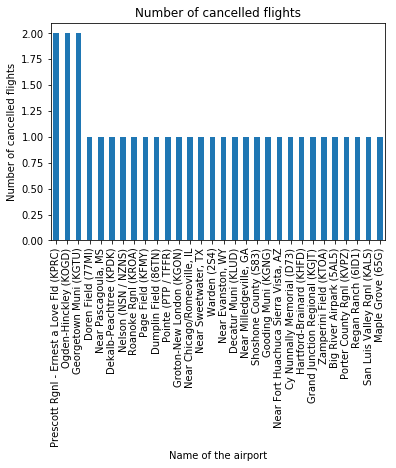

In [15]:
c182_cancelled['Origin'].value_counts().plot(kind='bar')
plt.title("Number of cancelled flights")
plt.ylabel("Number of cancelled flights")
plt.xlabel("Name of the airport")

The maximum number of flights that got cancelled were 2, and from the airports: Ogden-Hinckley (KOGD), Prescott Rgnl - Ernest a Love Fld (KPRC), Georgetown Muni (KGTU)

#### Dropping the Cancelled Flights from the original Dataframe

In [16]:
c182.dropna(axis=0, subset=["Destination"], inplace=True)
c182

,Ident,Type,Origin,Destination,Departure,EstimatedArrival Time,EstimatedTimeEnroute,EstimatedTimeEnroute (Min)
6,N7354H,C182,Auburn-Opelika (KAUO),Huntsville Executive (KMDQ),Fri 04:06PM CDT,Fri 05:20PM CDT,01:08,68.0
10,N3133R,C182,Jonesboro Muni (KJBR),Boone County (KHRO),Fri 04:04PM CDT,Fri 05:12PM CDT,01:03,63.0
16,N428LB,C182,Worcester Rgnl (KORH),East Hampton (KHTO),Fri 05:01PM EDT,Fri 05:39PM EDT,00:38,38.0
22,N3217Y,C182,Lancaster Rgnl (KLNC),Dallas Executive (KRBD),Fri 03:56PM CDT,NaN,NaN,NaN
23,N20920,C182,Memorial Field (KHOT),Cherokee County (KJSO),Fri 03:56PM CDT,Fri 05:30PM CDT,01:30,90.0
36,N6013S,C182,Smyrna (KMQY),Lorain County Rgnl (KLPR),Fri 03:48PM CDT,Fri 07:39PM EDT,02:49,169.0


Even in C182, there is still 1 flight which took off from Lancaster Rgnl(KLNC) and landed in Dallas Executive(KRBD) which did not record it's Departure and Estimated Arrival Time. 

Text(0.5, 0, 'Name of the airport')

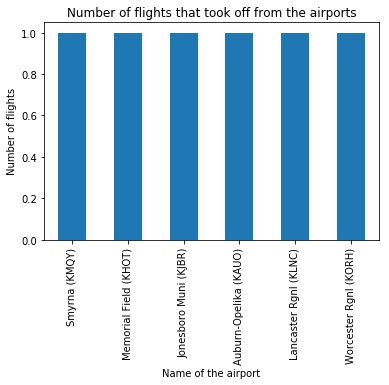

In [17]:
c182['Origin'].value_counts().plot(kind='bar')
plt.title("Number of flights that took off from the airports")
plt.ylabel("Number of flights")
plt.xlabel("Name of the airport")

### ANALYSIS FOR AIRCRAFT TYPE PC12

Reading the data for aircraft type PC12 into Jupyter Notebook

In [18]:
pc12 = pd.read_excel("/Users/apurvasalvi/Desktop/magniX/Aircraft type PC12.xlsx")
pc12

,Ident,Type,Origin,Destination,Departure,EstimatedArrival Time,EstimatedTimeEnroute,EstimatedTimeEnroute (Min)
0,N673BA,PC12,Fort Worth Meacham Intl (KFTW),Eagle County (KEGE),Fri 04:09PM CDT,Fri 05:53PM MDT,02:44,164.0
1,N853WM,PC12,Tallahassee Intl (KTLH),Henderson-Oxford (KHNZ),Fri 05:09PM EDT,Fri 07:08PM EDT,01:59,109.0
2,BTQ774,PC12,Phoenix Sky Harbor Intl (KPHX),Cortez Muni (KCEZ),Fri 02:07PM MST,Fri 04:15PM MDT,01:12,72.0
3,N807NG,PC12,Holyoke (KHEQ),Wausau Downtown (KAUW),Fri 03:07PM MDT,Fri 06:16PM CDT,01:30,90.0
4,N671NG,PC12,El Dorado Int'l (BOG / SKBO),NaN,Fri 04:06PM -05,NaN,NaN,NaN
5,N1245X,PC12,McCarran Intl (KLAS),Scottsdale (KSDL),Fri 02:06PM PDT,Fri 03:20PM MST,01:09,69.0
6,KUK848,PC12,Repulse Bay (CYUT),Kugaaruk (CYBB),Fri 04:06PM CDT,Fri 03:48PM MDT,00:42,42.0
7,NDL321,PC12,Kuujjuaq (CYVP),Mary River Aerodrome (YMV / CMR2),Fri 05:05PM EDT,Fri 08:27PM EDT,03:21,201.0
8,FD550,PC12,Adelaide Int'l (ADL / YPAD),Port Lincoln (PLO / YPLC),Sat 06:35AM ACST,Sat 07:20AM ACST,00:33,33.0
9,GPD515,PC12,Nantucket Memorial (KACK),Teterboro (KTEB),Fri 05:05PM EDT,Fri 06:16PM EDT,01:11,71.0


#### Checking for NaN

In [19]:
pc12.isnull().sum()

Ident                         0
Type                          0
Origin                        0
Destination                   5
Departure                     0
EstimatedArrival Time         6
EstimatedTimeEnroute          6
EstimatedTimeEnroute (Min)    6
dtype: int64

Out of the 33 flights of the type C182, we can see that only 5 flights never made to their destination or got cancelled.

Let's do some analysis on the cancelled flights

In [20]:
pc12_cancelled = pc12[pc12['Destination'].isnull()]
pc12_cancelled.Destination = pc12_cancelled.Destination.fillna('Cancelled Flight')
pc12_cancelled.drop(['EstimatedArrival Time', 'EstimatedTimeEnroute', 'EstimatedTimeEnroute (Min)'], axis=1)

,Ident,Type,Origin,Destination,Departure
4,N671NG,PC12,El Dorado Int'l (BOG / SKBO),Cancelled Flight,Fri 04:06PM -05
13,CST77,PC12,Marshfield Muni (KGHG),Cancelled Flight,Fri 04:59PM EDT
16,N521TX,PC12,Fresno Yosemite Intl (KFAT),Cancelled Flight,Fri 01:55PM PDT
20,N641AT,PC12,Merrill Field (MRI / PAMR),Cancelled Flight,Fri 12:48PM AKDT
21,BTQ905,PC12,Cortez Muni (KCEZ),Cancelled Flight,Fri 02:48PM MDT


#### Visualizing the number of flights that got cancelled

Text(0.5, 0, 'Name of the airport')

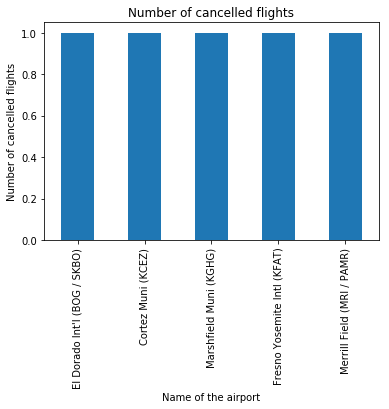

In [21]:
pc12_cancelled['Origin'].value_counts().plot(kind='bar')
plt.title("Number of cancelled flights")
plt.ylabel("Number of cancelled flights")
plt.xlabel("Name of the airport")

#### Dropping the Cancelled Flights from the original Dataframe

In [22]:
pc12.dropna(axis=0, subset=["Destination"], inplace=True)
pc12

,Ident,Type,Origin,Destination,Departure,EstimatedArrival Time,EstimatedTimeEnroute,EstimatedTimeEnroute (Min)
0,N673BA,PC12,Fort Worth Meacham Intl (KFTW),Eagle County (KEGE),Fri 04:09PM CDT,Fri 05:53PM MDT,02:44,164.0
1,N853WM,PC12,Tallahassee Intl (KTLH),Henderson-Oxford (KHNZ),Fri 05:09PM EDT,Fri 07:08PM EDT,01:59,109.0
2,BTQ774,PC12,Phoenix Sky Harbor Intl (KPHX),Cortez Muni (KCEZ),Fri 02:07PM MST,Fri 04:15PM MDT,01:12,72.0
3,N807NG,PC12,Holyoke (KHEQ),Wausau Downtown (KAUW),Fri 03:07PM MDT,Fri 06:16PM CDT,01:30,90.0
5,N1245X,PC12,McCarran Intl (KLAS),Scottsdale (KSDL),Fri 02:06PM PDT,Fri 03:20PM MST,01:09,69.0
6,KUK848,PC12,Repulse Bay (CYUT),Kugaaruk (CYBB),Fri 04:06PM CDT,Fri 03:48PM MDT,00:42,42.0
7,NDL321,PC12,Kuujjuaq (CYVP),Mary River Aerodrome (YMV / CMR2),Fri 05:05PM EDT,Fri 08:27PM EDT,03:21,201.0
8,FD550,PC12,Adelaide Int'l (ADL / YPAD),Port Lincoln (PLO / YPLC),Sat 06:35AM ACST,Sat 07:20AM ACST,00:33,33.0
9,GPD515,PC12,Nantucket Memorial (KACK),Teterboro (KTEB),Fri 05:05PM EDT,Fri 06:16PM EDT,01:11,71.0
10,CNS11,PC12,Nantucket Memorial (KACK),T. F. Green International (KPVD),Fri 05:03PM EDT,Fri 05:28PM EDT,00:21,21.0


Text(0.5, 0, 'Name of the airport')

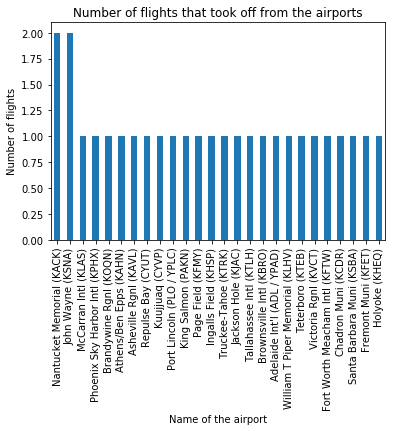

In [23]:
pc12['Origin'].value_counts().plot(kind='bar')
plt.title("Number of flights that took off from the airports")
plt.ylabel("Number of flights")
plt.xlabel("Name of the airport")

The airports at Nantucket Memorial (KACK) and John Wayne (KSNA) had the most number of flights departing today

### COMBINED ANALYSIS FOR C208, C182, AND PC12

Cancelled and non cancelled flight analysis

|---|C208|C182|PC12|
|---|---|---|---|
|Cancelled Flights|10|33|5|
|Flights that reached Destination|29|5|28|
|Total Flights Scheduled|39|38|33|

##### C208 -> 26% Cancelled Flights
##### C182 -> 86% Cancelled Flights
##### PC12 -> 15% Cancelled Flights

Most popular airports to take off from

|Aircraft Type|Origin|
|---|---|
|C208|Baltimore/Washington Intl(KBWI)|
|C182|---|
|PC12|Nantucket Memorial (KACK), John Wayne (KSNA)|

Most cancelled Flights

|Aircraft Type|Origin|
|---|---|
|C208|Bethel (BET/PABE)|
|C182|Ogden-Hinckley (KOGD), Prescott Rgnl - Ernest a Love Fld (KPRC), Georgetown Muni (KGTU)|
|PC12|El Dorado Int'l (BOG / SKBO), Marshfield Muni (KGHG), Fresno Yosemite Intl (KFAT), Merrill Field (MRI / PAMR), Cortez Muni (KCEZ)|

### CONCLUSION

From the analysis, it is clear that the aircraft type PC12 seems like the most reliable aircraft since it has a success rate of 85%, whereas the aircraft type C182 seems like the most unreliable airacraft with a success rate of only 14%
